# Domain Movement

*/ Update July 2018 /*
by Alexis Salas-Burgos PhD

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [2]:
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

/usr/local/anaconda3/envs/bio/lib/python3.6/site-packages/MDAnalysis/due.py:88: UserWarning: No module named 'duecredit'
  warnings.warn(str(err))


In [4]:
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"
# load trajectory
#from MDAnalysis.tests.datafiles import PSF, DCD, PDB
## MDAnalysis
u = mda.Universe(PSF, DCD)
## MDTraj
t = mdt.load(DCD, top=PSF)
## PyTraj
p = mdp.load(DCD, top=PSF)

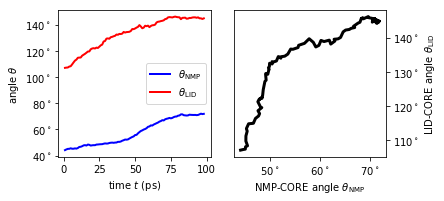

In [6]:
## MDAnalysis
import numpy as np
from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
    B = u.select_atoms("resid 90-100 and (backbone or name CB)").center_of_geometry()
    A = u.select_atoms("resid 35-55 and (backbone or name CB)").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 179-185 and (backbone or name CB)").center_of_geometry()
    B = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
    A = u.select_atoms("resid 125-153 and (backbone or name CB)").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

if __name__ == "__main__":
    import MDAnalysis
    from MDAnalysis.tests.datafiles import PSF, DCD
    import matplotlib
    import matplotlib.pyplot as plt

    u = MDAnalysis.Universe(PSF, DCD)
    data = np.array([(u.trajectory.time, theta_NMP(u), theta_LID(u)) for ts in u.trajectory])
    time, NMP, LID = data.T


    # plotting
    degreeFormatter = matplotlib.ticker.FormatStrFormatter(r"%g$^\circ$")
    fig = plt.figure(figsize=(6,3))

    ax1 = fig.add_subplot(121)
    ax1.plot(time, NMP, 'b-', lw=2, label=r"$\theta_{\mathrm{NMP}}$")
    ax1.plot(time, LID, 'r-', lw=2, label=r"$\theta_{\mathrm{LID}}$")
    ax1.set_xlabel(r"time $t$ (ps)")
    ax1.set_ylabel(r"angle $\theta$")
    ax1.yaxis.set_major_formatter(degreeFormatter)
    ax1.legend(loc="best")

    ax2 = fig.add_subplot(122)
    ax2.plot(NMP, LID, 'k-', lw=3)
    ax2.set_xlabel(r"NMP-CORE angle $\theta_{\mathrm{NMP}}$")
    ax2.set_ylabel(r"LID-CORE angle $\theta_{\mathrm{LID}}$")
    ax2.xaxis.set_major_formatter(degreeFormatter)
    ax2.yaxis.set_major_formatter(degreeFormatter)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    fig.subplots_adjust(left=0.12, right=0.88, bottom=0.2, wspace=0.15)

    for ext in ('svg', 'pdf', 'png'):
        fig.savefig("NMP_LID_angle_projection.{0}".format(ext))